In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform,randint
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/preprocess_data.csv',sep = ',')

In [3]:
pd.options.display.max_columns = None
data.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptPoss,teamDrtg,teamEDiff,team_Game_Score,opptFGM,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
0,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0,0.0,53.0,21.0,54.838710,28.571429,45.003104,40.566038,40.000000,68.750000,20.874263,69.44,8.640553,4.320276,9.090909,1.094340,36.206897,9.293680,0.352941,0.352941,24.000,83.525346,56.0,68.36,96.547689,-13.022343,26.4,24.0,45.161290,45.833333,51.274083,50.892857,31.250000,60.000000,17.866258,11.702750,4.388531,6.976744,1.178571,37.375,96.547689,83.525346,13.022343,40.000000,15.143172,0.785714,0.571429,39.8,-8.0,0,0,0,0,1,0,0
1,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0,1.0,61.0,27.0,50.000000,81.481481,60.739923,52.459016,26.470588,78.571429,19.902698,81.44,8.595285,3.683694,7.142857,1.442623,38.571429,24.564538,1.222222,0.388889,60.500,108.055010,58.0,79.24,102.221100,5.833909,65.5,31.0,50.000000,16.129032,60.232005,57.758621,21.428571,73.529412,21.116847,10.095911,1.261989,2.857143,1.396552,38.375,102.221100,108.055010,-5.833909,44.285714,6.967670,0.277778,0.444444,46.3,7.0,0,0,0,0,1,0,0
2,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0,0.0,58.0,29.0,52.459016,51.724138,57.634731,54.310345,39.393939,67.857143,15.228426,65.80,10.638298,1.519757,2.564103,1.327586,50.877193,19.685039,1.250000,0.583333,55.250,117.021277,62.0,67.40,127.596439,-10.575163,59.4,35.0,47.540984,45.714286,64.759036,64.516129,32.142857,60.606061,13.089005,14.836795,1.483680,2.173913,1.387097,65.250,127.596439,117.021277,10.575163,55.555556,19.138756,1.600000,1.000000,70.0,-9.0,0,0,0,0,1,0,0
3,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,41.0,0.51220,

In [4]:
data["Tournament"].unique()

array(['Basket League', 'Liga ACB', 'Eurocup', 'Euroleague'], dtype=object)

# Teams as Dummy Variables

In [5]:
baseline_data = data[["Tournament","Match Date","Home Team","Away Team","Team Result","Winner Team","Phase"]]
baseline_data.head()

,Tournament,Match Date,Home Team,Away Team,Team Result,Winner Team,Phase
0,Basket League,2013-10-12,KAOD,Aris,0.0,Aris,Regular Season
1,Basket League,2013-10-12,PAOK,Kolossos Rhodes,1.0,PAOK,Regular Season
2,Liga ACB,2013-10-12,Bilbao,Zaragoza,0.0,Zaragoza,Regular Season
3,Basket League,2013-10-12,Trikala,Kifisia,0.0,Kifisia,Regular Season
4,Liga ACB,2013-10-12,Tenerife,Obradoiro,1.0,Tenerife,Regular Season


## Greek Basket League 

In [6]:
greek_baseline_data = baseline_data[["Tournament","Match Date","Home Team","Away Team","Team Result","Winner Team","Phase"]][baseline_data["Tournament"]=='Basket League'].reset_index(drop = True)
greek_baseline_data.head()

,Tournament,Match Date,Home Team,Away Team,Team Result,Winner Team,Phase
0,Basket League,2013-10-12,KAOD,Aris,0.0,Aris,Regular Season
1,Basket League,2013-10-12,PAOK,Kolossos Rhodes,1.0,PAOK,Regular Season
2,Basket League,2013-10-12,Trikala,Kifisia,0.0,Kifisia,Regular Season
3,Basket League,2013-10-13,Panelefsiniakos,Panionios,0.0,Panionios,Regular Season
4,Basket League,2013-10-13,Rethymno,Ikaros,1.0,Rethymno,Regular Season


In [7]:
greece_x = pd.get_dummies(greek_baseline_data[["Home Team","Away Team"]]).reset_index(drop = True)
greece_y = greek_baseline_data["Team Result"]

In [8]:
greece_x.head()

,Home Team_AEK,Home Team_Apollon Patras,Home Team_Aris,Home Team_Arkadikos,Home Team_Doxa Lefkadas,Home Team_Ifaistos Limnou,Home Team_Ikaros,Home Team_Ilisiakos,Home Team_KAOD,Home Team_Kavala,Home Team_Kifisia,Home Team_Kolossos Rhodes,Home Team_Koroivos,Home Team_Kymi,Home Team_Lavrio,Home Team_Olympiacos,Home Team_PAOK,Home Team_Panathinaikos,Home Team_Panelefsiniakos,Home Team_Panionios,Home Team_Promitheas Patras,Home Team_Rethymno,Home Team_Trikala,Away Team_AEK,Away Team_Apollon Patras,Away Team_Aris,Away Team_Arkadikos,Away Team_Doxa Lefkadas,Away Team_Ifaistos Limnou,Away Team_Ikaros,Away Team_Ilisiakos,Away Team_KAOD,Away Team_Kavala,Away Team_Kifisia,Away Team_Kolossos Rhodes,Away Team_Koroivos,Away Team_Kymi,Away Team_Lavrio,Away Team_Olympiacos,Away Team_PAOK,Away Team_Panathinaikos,Away Team_Panelefsiniakos,Away Team_Panionios,Away Team_Promitheas Patras,Away Team_Rethymno,Away Team_Trikala
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train_greece=greece_x.iloc[:len(greek_baseline_data[greek_baseline_data["Match Date"]<"2017-08-01"])]
y_train_greece=greece_y.iloc[:len(greek_baseline_data[greek_baseline_data["Match Date"]<"2017-08-01"])]
x_test_greece=greece_x.iloc[len(greek_baseline_data[greek_baseline_data["Match Date"]<"2017-08-01"]):]
y_test_greece=greece_y.iloc[len(greek_baseline_data[greek_baseline_data["Match Date"]<"2017-08-01"]):]

###  Logistic Regression

In [11]:
hyper_parameter_grid = {'C':uniform(0, 10),'penalty':['l1', 'l2']}
                       

lgr = RandomizedSearchCV(LogisticRegression(solver='liblinear'), hyper_parameter_grid, cv=KFold(10),scoring='brier_score_loss',
                         n_iter=10000,verbose = 1,n_jobs=-1)
lgr.fit(x_train_greece, y_train_greece)

print("Best parameters set found on held-out set:")
print()
print(lgr.best_params_)
print()
print("Best score found on held-out set:")
print(-lgr.best_score_)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3724 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 11724 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 22924 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 37324 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 54924 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 75724 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 99694 tasks      | elapsed:  1.7min


Best parameters set found on held-out set:

{'C': 0.6958561300804667, 'penalty': 'l1'}

Best score found on held-out set:
0.15046171299620187


[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  1.7min finished


In [10]:
lgr = LogisticRegression(C = 0.6958561300804667,penalty = 'l1', solver= 'liblinear').fit(x_train_greece, y_train_greece)
y_pre_proba_lgr=lgr.predict_proba(x_test_greece)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_greece),3))


Logistic Regression

Test BS: 0.173

Test Accuracy: 0.745

Test F1-score 0.814


In [12]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],greece_x.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index()

In [13]:
sorted_coef1

,index,0
0,Away Team_Olympiacos,-3.712944
1,Home Team_Olympiacos,3.634688
2,Home Team_Panathinaikos,3.385397
3,Away Team_Panathinaikos,-3.248818
4,Home Team_AEK,1.505128
5,Away Team_AEK,-1.390301
6,Home Team_Aris,1.171210
7,Away Team_Ilisiakos,1.071271
8,Away Team_Ikaros,1.071218
9,Away Team_Kymi,1.025546


#### Home Effect

In [44]:
lgr.intercept_

array([0.70606325])

## Random Forest Classifier

In [12]:
# Number of trees in random forest
n_estimators = randint(1, 100)
# Number of features to consider at every split
max_features = ["log2", 'sqrt']
# Maximum number of levels in tree
max_depth = randint(1, 50)
# Minimum number of samples required to split a internal node
min_samples_split = uniform(0, 1)
# Minimum number of samples required at each leaf node
min_samples_leaf = uniform(0, 0.5)

# Create the random grid
hyper_parameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rfc = RandomizedSearchCV(RandomForestClassifier(random_state =1), hyper_parameter_grid,cv=KFold(10),scoring='brier_score_loss'
                         ,n_iter=25000
                         ,verbose = 1,n_jobs=-1)


rfc.fit(x_train_greece, y_train_greece)

print("Best parameters set found on held-out set:")
print()
print(rfc.best_params_)
print()
print("Best score found on held-out set:")
print(-rfc.best_score_)

Fitting 10 folds for each of 25000 candidates, totalling 250000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 3092 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 4892 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 7092 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 12692 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 16092 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 19892 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 24092 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 28692 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 34780 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 45580 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 57180 tas

Best parameters set found on held-out set:

{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 0.002232302081979387, 'min_samples_split': 0.007676145888251162, 'n_estimators': 79}

Best score found on held-out set:
0.1569394079530395


In [14]:
rfc = RandomForestClassifier(max_depth= 30, max_features='log2', min_samples_leaf=0.002232302081979387,
                             min_samples_split=0.0076761458882511, n_estimators=79
                             ,random_state= 1).fit(x_train_greece, y_train_greece)

y_pre_proba_rfc=rfc.predict_proba(x_test_greece)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(pd.Series(y_pre_proba_rfc[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_greece),3))

Random Forest Classifier

Test BS: 0.171

Test Accuracy: 0.76

Test F1-score 0.829


In [15]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),greece_x.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index()
sorted_coef2

,index,0
0,Away Team_Olympiacos,0.209886
1,Away Team_Panathinaikos,0.171367
2,Home Team_Olympiacos,0.078945
3,Home Team_Panathinaikos,0.077538
4,Away Team_AEK,0.028534
5,Home Team_Panelefsiniakos,0.027399
6,Home Team_AEK,0.021698
7,Home Team_Doxa Lefkadas,0.020764
8,Away Team_PAOK,0.020654
9,Away Team_Trikala,0.020073


## xgboost

In [13]:
hyper_parameter_grid = {"learning_rate": uniform(0.001,0.5),
                        'max_depth' : randint(1, 50),
                        "n_estimators":randint(1,100),
                        "subsample":uniform(0,1),
                        "colsample_bytree":uniform(0,1),
                        "gamma":uniform(0.0,10),
                        "reg_lambda":uniform(0.0,1)}

xgb = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), hyper_parameter_grid, cv=KFold(10),scoring='brier_score_loss',
                         n_iter=35000,verbose = 1,n_jobs=-1)
xgb.fit(x_train_greece, y_train_greece)

print("Best parameters set found on held-out set:")
print()
print(xgb.best_params_)
print()
print("Best score found on held-out set:")
print(-xgb.best_score_)

Fitting 10 folds for each of 35000 candidates, totalling 350000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 4424 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6624 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 9224 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 12224 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 15624 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 19424 tasks      | elapsed:  5.6min
[Parallel(n_jo

Best parameters set found on held-out set:

{'colsample_bytree': 0.9245142407355682, 'gamma': 1.8332482648488946, 'learning_rate': 0.25710478164991957, 'max_depth': 31, 'n_estimators': 65, 'reg_lambda': 0.5459315485081014, 'subsample': 0.1698090213208171}

Best score found on held-out set:
0.15183378664397731


In [18]:
alg = XGBClassifier(colsample_bytree = 0.9245142407355682, gamma = 1.8332482648488946, learning_rate = 0.25710478164991957,
                    max_depth= 31, n_estimators= 65, reg_lambda= 0.5459315485081014, subsample= 0.1698090213208171, 
                    objective='binary:logistic').fit(x_train_greece, y_train_greece)




y_pre_proba_alg=alg.predict_proba(x_test_greece)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_alg[:,1]),4))
print()
y_pre_alg=np.where(pd.Series(y_pre_proba_alg[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg,y_test_greece),4))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_greece),4))


xgboost

Test BS: 0.1656

Test Accuracy: 0.7647

Test F1-score 0.831


In [19]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),greece_x.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index()
sorted_coef3

,index,0
0,Away Team_Olympiacos,0.056299
1,Away Team_Panathinaikos,0.054403
2,Home Team_Panelefsiniakos,0.043586
3,Home Team_Kavala,0.040817
4,Home Team_Koroivos,0.039534
5,Away Team_Aris,0.039154
6,Home Team_Rethymno,0.035269
7,Home Team_Panathinaikos,0.035241
8,Away Team_Rethymno,0.035136
9,Away Team_PAOK,0.034707


# Ensemble

In [21]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,ens_proba),3))
print()
y_pre_ens=np.where(pd.Series(ens_proba)>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_ens,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_ens,y_test_greece),3))


------Ensemble 3 classifier-------

Test BS: 0.168

Test Accuracy: 0.745

Test F1-score 0.814


In [22]:
pd.options.display.max_rows = None
see_final_g=greek_baseline_data[["Home Team","Away Team","Team Result","Winner Team"]][greek_baseline_data["Match Date"]>"2017-08-01"]
see_final_g["prediction probability"]=ens_proba
see_final_g["RPS"]=(see_final_g["Team Result"]-see_final_g["prediction probability"])**2
see_final_g[see_final_g["RPS"]>0.5]

,Home Team,Away Team,Team Result,Winner Team,prediction probability,RPS
826,PAOK,Promitheas Patras,0.0,Promitheas Patras,0.825799,0.681945
829,Olympiacos,Panathinaikos,0.0,Panathinaikos,0.710325,0.504562
847,Rethymno,Lavrio,0.0,Lavrio,0.762195,0.580941
867,Ifaistos Limnou,Rethymno,0.0,Rethymno,0.708259,0.501631
869,Panionios,Kymi,0.0,Kymi,0.734580,0.539608
877,Trikala,Kymi,0.0,Kymi,0.811989,0.659326
879,AEK,Olympiacos,1.0,AEK,0.190677,0.655004
896,Ifaistos Limnou,Lavrio,0.0,Lavrio,0.711341,0.506006
901,PAOK,Olympiacos,1.0,PAOK,0.134854,0.748478
905,Koroivos,Kymi,0.0,Kymi,0.766085,0.586886


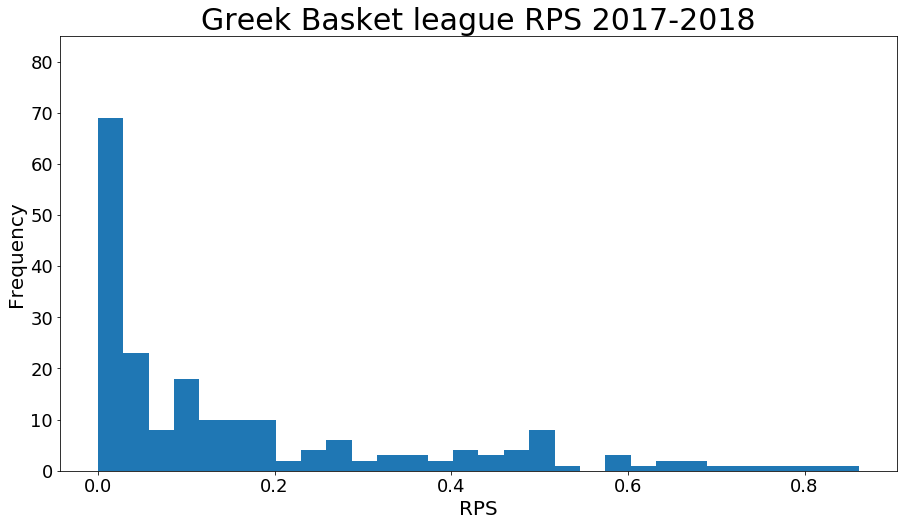

In [24]:
plt.figure(figsize=(15,8))



plt.hist(see_final_g["RPS"], 30, density=0)

plt.xlabel('RPS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Greek Basket league RPS 2017-2018',fontsize=30)
plt.ylim(0,85)
plt.show()

In [25]:
greece_match_ups = greek_baseline_data[["Home Team","Away Team","Match Date","Winner Team"]][(greek_baseline_data["Match Date"]>'2017-08-01') & (greek_baseline_data["Tournament"]=='Basket League') & (greek_baseline_data["Phase"] == "Regular Season")]
greece_match_ups["Probability"] = ens_proba[:len(greece_match_ups)]
greece_match_ups["Winner Prediction"] = np.where(greece_match_ups["Probability"]>0.5,greece_match_ups["Home Team"],greece_match_ups["Away Team"])
greece_match_ups.head()

,Home Team,Away Team,Match Date,Winner Team,Probability,Winner Prediction
825,Kolossos Rhodes,Rethymno,2017-10-07,Kolossos Rhodes,0.767936,Kolossos Rhodes
826,PAOK,Promitheas Patras,2017-10-07,Promitheas Patras,0.825799,PAOK
827,Ifaistos Limnou,Panionios,2017-10-07,Ifaistos Limnou,0.641547,Ifaistos Limnou
828,AEK,Trikala,2017-10-07,AEK,0.920775,AEK
829,Olympiacos,Panathinaikos,2017-10-08,Panathinaikos,0.710325,Olympiacos


In [26]:
pd.crosstab(index=greece_match_ups["Winner Prediction"], columns="count").sort_values("count",ascending = False)

col_0,count
Winner Prediction,
Olympiacos,25
Panathinaikos,25
AEK,20
Aris,18
PAOK,18
Kolossos Rhodes,10
Rethymno,10
Ifaistos Limnou,8
Koroivos,8


In [27]:
pd.crosstab(index=greece_match_ups["Winner Team"], columns="count").sort_values("count",ascending = False)

col_0,count
Winner Team,
Panathinaikos,26
Olympiacos,22
PAOK,17
Promitheas Patras,17
AEK,15
Kymi,14
Lavrio,14
Kolossos Rhodes,11
Aris,10


# Liga ACB

In [28]:
spain_baseline_data = baseline_data[["Tournament","Match Date","Home Team","Away Team","Team Result","Winner Team","Phase"]][baseline_data["Tournament"]=='Liga ACB'].reset_index(drop = True)
spain_baseline_data.head()

,Tournament,Match Date,Home Team,Away Team,Team Result,Winner Team,Phase
0,Liga ACB,2013-10-12,Bilbao,Zaragoza,0.0,Zaragoza,Regular Season
1,Liga ACB,2013-10-12,Tenerife,Obradoiro,1.0,Tenerife,Regular Season
2,Liga ACB,2013-10-13,Manresa,Joventut,1.0,Manresa,Regular Season
3,Liga ACB,2013-10-13,Baskonia,Gran Canaria,0.0,Gran Canaria,Regular Season
4,Liga ACB,2013-10-13,Gipuzkoa,Real Betis,1.0,Gipuzkoa,Regular Season


In [29]:
spain_x = pd.get_dummies(spain_baseline_data[["Home Team","Away Team"]]).reset_index(drop = True)
spain_y = spain_baseline_data["Team Result"]

In [30]:
spain_x.head()

,Home Team_Andorra,Home Team_Barcelona,Home Team_Baskonia,Home Team_Bilbao,Home Team_Burgos,Home Team_Estudiantes,Home Team_Fuenlabrada,Home Team_Gipuzkoa,Home Team_Gran Canaria,Home Team_Joventut,Home Team_Manresa,Home Team_Murcia,Home Team_Obradoiro,Home Team_Real Betis,Home Team_Real Madrid,Home Team_Tenerife,Home Team_Unicaja Malaga,Home Team_Valencia,Home Team_Valladolid,Home Team_Zaragoza,Away Team_Andorra,Away Team_Barcelona,Away Team_Baskonia,Away Team_Bilbao,Away Team_Burgos,Away Team_Estudiantes,Away Team_Fuenlabrada,Away Team_Gipuzkoa,Away Team_Gran Canaria,Away Team_Joventut,Away Team_Manresa,Away Team_Murcia,Away Team_Obradoiro,Away Team_Real Betis,Away Team_Real Madrid,Away Team_Tenerife,Away Team_Unicaja Malaga,Away Team_Valencia,Away Team_Valladolid,Away Team_Zaragoza
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
x_train_spain=spain_x.iloc[:len(spain_baseline_data[spain_baseline_data["Match Date"]<"2017-08-01"])]
y_train_spain=spain_y.iloc[:len(spain_baseline_data[spain_baseline_data["Match Date"]<"2017-08-01"])]
x_test_spain=spain_x.iloc[len(spain_baseline_data[spain_baseline_data["Match Date"]<"2017-08-01"]):]
y_test_spain=spain_y.iloc[len(spain_baseline_data[spain_baseline_data["Match Date"]<"2017-08-01"]):]

###  Logistic Regression

In [19]:
hyper_parameter_grid = {'C':uniform(0, 10),'penalty':['l1', 'l2']}
                       

lgr = RandomizedSearchCV(LogisticRegression(solver='liblinear'), hyper_parameter_grid, cv=KFold(10),scoring='brier_score_loss',
                         n_iter=10000,verbose = 1,n_jobs=-1)
lgr.fit(x_train_spain, y_train_spain)

print("Best parameters set found on held-out set:")
print()
print(lgr.best_params_)
print()
print("Best score found on held-out set:")
print(-lgr.best_score_)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4468 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 12468 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 23668 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 38068 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 55668 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 76468 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 99808 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  1.8min finished


Best parameters set found on held-out set:

{'C': 1.1752489584193138, 'penalty': 'l1'}

Best score found on held-out set:
0.18641103022993766


In [32]:
lgr = LogisticRegression(solver='liblinear',C = 1.1752489584193138, penalty = 'l1').fit(x_train_spain, y_train_spain)
y_pre_proba_lgr=lgr.predict_proba(x_test_spain)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_spain),3))


Logistic Regression

Test BS: 0.21

Test Accuracy: 0.688

Test F1-score 0.768


In [33]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],spain_x.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index()

In [34]:
sorted_coef2

,index,0
0,Away Team_Valladolid,2.308832
1,Home Team_Real Madrid,2.153361
2,Away Team_Real Madrid,-2.001778
3,Home Team_Barcelona,1.878612
4,Home Team_Valladolid,-1.713102
5,Away Team_Valencia,-1.706853
6,Away Team_Barcelona,-1.458255
7,Home Team_Manresa,-1.269111
8,Home Team_Baskonia,1.243202
9,Home Team_Valencia,1.226736


#### Home Effect

In [36]:
lgr.intercept_

array([0.67512184])

## Random Forest Classifier

In [20]:
# Number of trees in random forest
n_estimators = randint(1, 100)
# Number of features to consider at every split
max_features = ["log2", 'sqrt']
# Maximum number of levels in tree
max_depth = randint(1, 50)
# Minimum number of samples required to split a internal node
min_samples_split = uniform(0, 1)
# Minimum number of samples required at each leaf node
min_samples_leaf =uniform(0, 0.5)

# Create the random grid
hyper_parameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rfc = RandomizedSearchCV(RandomForestClassifier(random_state =1), hyper_parameter_grid, cv=KFold(10),
                         scoring='brier_score_loss',n_iter=25000,verbose = 1,n_jobs=-1)


rfc.fit(x_train_spain, y_train_spain)

print("Best parameters set found on held-out set:")
print()
print(rfc.best_params_)
print()
print("Best score found on held-out set:")
print(-rfc.best_score_)

Fitting 10 folds for each of 25000 candidates, totalling 250000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 2988 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 5788 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 9388 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 13788 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 18988 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 24988 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 31788 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 39388 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 47788 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 56988 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 66988 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 77788 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 89388 t

Best parameters set found on held-out set:

{'max_depth': 46, 'max_features': 'log2', 'min_samples_leaf': 7.142711830299131e-05, 'min_samples_split': 0.04972775232938931, 'n_estimators': 69}

Best score found on held-out set:
0.18898303025664182


In [38]:
rfc = RandomForestClassifier(max_depth= 46, max_features='log2', min_samples_leaf=7.142711830299131e-05,
                             min_samples_split=0.04972775232938931, n_estimators=69,
                             random_state=1).fit(x_train_spain, y_train_spain)

y_pre_proba_rfc=rfc.predict_proba(x_test_spain)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(pd.Series(y_pre_proba_rfc[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_spain),3))

Random Forest Classifier

Test BS: 0.208

Test Accuracy: 0.688

Test F1-score 0.77


In [39]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),spain_x.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index()
sorted_coef2

,index,0
0,Away Team_Real Madrid,0.117317
1,Home Team_Real Madrid,0.091281
2,Away Team_Valencia,0.085033
3,Home Team_Manresa,0.078386
4,Home Team_Barcelona,0.070625
5,Away Team_Barcelona,0.063561
6,Home Team_Valladolid,0.045502
7,Home Team_Valencia,0.039824
8,Home Team_Gipuzkoa,0.037023
9,Home Team_Unicaja Malaga,0.036896


## xgboost

In [21]:
hyper_parameter_grid = {"learning_rate": uniform(0.001,0.5),
                        'max_depth' : randint(1, 50),
                        "n_estimators":randint(1,100),
                        "subsample":uniform(0,1),
                        "colsample_bytree":uniform(0,1),
                        "gamma":uniform(0.0,10),
                        "reg_lambda":uniform(0.0,1)}

xgb = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), hyper_parameter_grid, cv=KFold(10),scoring='brier_score_loss',
                         n_iter=35000,verbose = 1,n_jobs=-1)
xgb.fit(x_train_spain, y_train_spain)

print("Best parameters set found on held-out set:")
print()
print(xgb.best_params_)
print()
print("Best score found on held-out set:")
print(-xgb.best_score_)

Fitting 10 folds for each of 35000 candidates, totalling 350000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 1188 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 2278 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 3862 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5202 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7490 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 9082 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 10998 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 14408 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 17864 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 20634 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 24104 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 28568 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 33474 task

Best parameters set found on held-out set:

{'colsample_bytree': 0.8060200683983804, 'gamma': 0.06401442848425587, 'learning_rate': 0.4519604986477713, 'max_depth': 1, 'n_estimators': 77, 'reg_lambda': 0.41245299519639445, 'subsample': 0.7918001136457985}

Best score found on held-out set:
0.18542713192608612


In [41]:
alg = XGBClassifier(colsample_bytree= 0.8060200683983804, gamma= 0.06401442848425587, learning_rate= 0.4519604986477713,
                    max_depth= 1, n_estimators= 77, reg_lambda= 0.41245299519639445, subsample= 0.7918001136457985,
                    objective='binary:logistic').fit(x_train_spain, y_train_spain)

y_pre_proba_alg=alg.predict_proba(x_test_spain)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(pd.Series(y_pre_proba_alg[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_spain),3))


xgboost

Test BS: 0.213

Test Accuracy: 0.676

Test F1-score 0.764


In [42]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),spain_x.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index()
sorted_coef3

,index,0
0,Home Team_Manresa,0.082257
1,Away Team_Real Madrid,0.078088
2,Home Team_Gipuzkoa,0.064239
3,Away Team_Barcelona,0.058809
4,Away Team_Valencia,0.058282
5,Home Team_Barcelona,0.057363
6,Home Team_Real Madrid,0.050039
7,Home Team_Valencia,0.040462
8,Home Team_Real Betis,0.039388
9,Home Team_Valladolid,0.036517


In [43]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,ens_proba),3))
print()
y_pre_ens=np.where(pd.Series(ens_proba)>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_ens,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_ens,y_test_spain),3))


------Ensemble 3 classifier-------

Test BS: 0.209

Test Accuracy: 0.691

Test F1-score 0.773


In [44]:
pd.options.display.max_rows = None
see_final_g=spain_baseline_data[["Home Team","Away Team","Team Result"]][spain_baseline_data["Match Date"]>"2017-08-01"]
see_final_g["prediction probability"]=ens_proba
see_final_g["RPS"]=(see_final_g["Team Result"]-see_final_g["prediction probability"])**2
see_final_g[see_final_g["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
1291,Andorra,Fuenlabrada,0.0,0.736815,0.542896
1306,Burgos,Estudiantes,0.0,0.766419,0.587398
1331,Barcelona,Murcia,0.0,0.917806,0.842368
1332,Baskonia,Zaragoza,0.0,0.847842,0.718835
1335,Murcia,Obradoiro,0.0,0.728501,0.530714
1336,Unicaja Malaga,Baskonia,0.0,0.801830,0.642932
1349,Real Madrid,Barcelona,0.0,0.758425,0.575208
1371,Barcelona,Tenerife,0.0,0.889476,0.791168
1373,Estudiantes,Valencia,1.0,0.254460,0.555830
1378,Burgos,Fuenlabrada,0.0,0.743787,0.553219


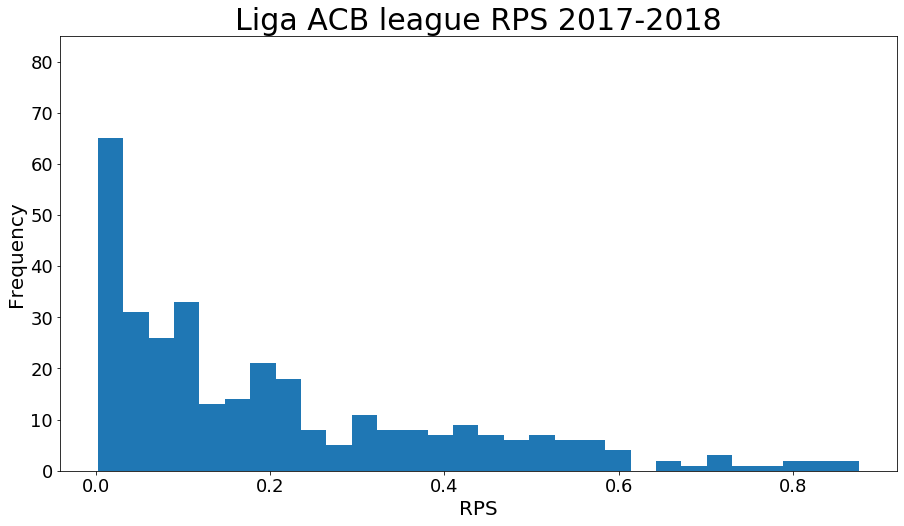

In [45]:
plt.figure(figsize=(15,8))

plt.hist(see_final_g["RPS"], 30, density=0)

plt.xlabel('RPS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Liga ACB league RPS 2017-2018',fontsize=30)
plt.ylim(0,85)
plt.show()

In [46]:
spain_match_ups = spain_baseline_data[["Home Team","Away Team","Match Date","Winner Team"]][(spain_baseline_data["Match Date"]>'2017-08-01') & (spain_baseline_data["Tournament"]=='Liga ACB') & (spain_baseline_data["Phase"] == "Regular Season")]
spain_match_ups["Probability"] = ens_proba[:len(spain_match_ups)]
spain_match_ups["Winner Prediction"] = np.where(spain_match_ups["Probability"]>0.5,spain_match_ups["Home Team"],spain_match_ups["Away Team"])
spain_match_ups.head()

,Home Team,Away Team,Match Date,Winner Team,Probability,Winner Prediction
1280,Barcelona,Baskonia,2017-09-29,Barcelona,0.896012,Barcelona
1281,Obradoiro,Zaragoza,2017-09-30,Obradoiro,0.554903,Obradoiro
1282,Fuenlabrada,Bilbao,2017-09-30,Fuenlabrada,0.565550,Fuenlabrada
1283,Gran Canaria,Gipuzkoa,2017-10-01,Gran Canaria,0.812201,Gran Canaria
1284,Murcia,Unicaja Malaga,2017-10-01,Unicaja Malaga,0.459527,Unicaja Malaga


In [47]:
pd.crosstab(index=spain_match_ups["Winner Prediction"], columns="count").sort_values("count",ascending = False)

col_0,count
Winner Prediction,
Real Madrid,33
Barcelona,30
Valencia,29
Unicaja Malaga,28
Baskonia,20
Gran Canaria,20
Tenerife,17
Joventut,14
Bilbao,14


In [48]:
pd.crosstab(index=spain_match_ups["Winner Team"], columns="count").sort_values("count",ascending = False)

col_0,count
Winner Team,
Real Madrid,30
Baskonia,25
Barcelona,24
Valencia,22
Gran Canaria,20
Andorra,19
Tenerife,19
Unicaja Malaga,19
Estudiantes,17


# Euroleague

In [49]:
el_baseline_data = baseline_data[["Match Date","Home Team","Away Team","Team Result"]][baseline_data["Tournament"]=='Euroleague'].reset_index(drop = True)
el_baseline_data.head()

,Match Date,Home Team,Away Team,Team Result
0,2013-10-16,Bamberg,Strasbourg,1.0
1,2013-10-16,Siena,Galatasaray,0.0
2,2013-10-17,Barcelona,Partizan,1.0
3,2013-10-17,Nanterre,CSKA Moscow,0.0
4,2013-10-17,Anadolu Efes,Armani Milano,1.0


In [50]:
el_x = pd.get_dummies(el_baseline_data[["Home Team","Away Team"]]).reset_index(drop = True)
el_y = el_baseline_data["Team Result"]

In [51]:
el_x.head()

,Home Team_Alba Berlin,Home Team_Anadolu Efes,Home Team_Armani Milano,Home Team_Bamberg,Home Team_Barcelona,Home Team_Baskonia,Home Team_Bayern Munich,Home Team_Budivelnyk,Home Team_CSKA Moscow,Home Team_Cedevita,Home Team_Crvena Zvezda,Home Team_Darussafaka,Home Team_Dinamo Sassari,Home Team_Fenerbahce,Home Team_Galatasaray,Home Team_Khimki,Home Team_Limoges,Home Team_Lokomotiv Kuban,Home Team_Maccabi Tel Aviv,Home Team_Nanterre,Home Team_Neptunas,Home Team_Nizhny Novgorod,Home Team_Olympiacos,Home Team_Panathinaikos,Home Team_Partizan,Home Team_Pinar Karsiyaka,Home Team_Real Madrid,Home Team_Rytas Vilnius,Home Team_Siena,Home Team_Strasbourg,Home Team_Turow Zgorzelec,Home Team_Unicaja Malaga,Home Team_Unics Kazan,Home Team_Valencia,Home Team_Zalgiris,Home Team_Zielona Gora,Away Team_Alba Berlin,Away Team_Anadolu Efes,Away Team_Armani Milano,Away Team_Bamberg,Away Team_Barcelona,Away Team_Baskonia,Away Team_Bayern Munich,Away Team_Budivelnyk,Away Team_CSKA Moscow,Away Team_Cedevita,Away Team_Crvena Zvezda,Away Team_Darussafaka,Away Team_Dinamo Sassari,Away Team_Fenerbahce,Away Team_Galatasaray,Away Team_Khimki,Away Team_Limoges,Away Team_Lokomotiv Kuban,Away Team_Maccabi Tel Aviv,Away Team_Nanterre,Away Team_Neptunas,Away Team_Nizhny Novgorod,Away Team_Olympiacos,Away Team_Panathinaikos,Away Team_Partizan,Away Team_Pinar Karsiyaka,Away Team_Real Madrid,Away Team_Rytas Vilnius,Away Team_Siena,Away Team_Strasbourg,Away Team_Turow Zgorzelec,Away Team_Unicaja Malaga,Away Team_Unics Kazan,Away Team_Valencia,Away Team_Zalgiris,Away Team_Zielona Gora
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
x_train_el=el_x.iloc[:len(el_baseline_data[el_baseline_data["Match Date"]<"2017-08-01"])]
y_train_el=el_y.iloc[:len(el_baseline_data[el_baseline_data["Match Date"]<"2017-08-01"])]
x_test_el=el_x.iloc[len(el_baseline_data[el_baseline_data["Match Date"]<"2017-08-01"]):]
y_test_el=el_y.iloc[len(el_baseline_data[el_baseline_data["Match Date"]<"2017-08-01"]):]

###  Logistic Regression

In [27]:
hyper_parameter_grid = {'C':uniform(0, 10),'penalty':['l1', 'l2']}
                       

lgr = RandomizedSearchCV(LogisticRegression(solver='liblinear'), hyper_parameter_grid, cv=KFold(10),scoring='brier_score_loss',
                         n_iter=10000,verbose = 1,n_jobs=-1)
lgr.fit(x_train_el, y_train_el)

print("Best parameters set found on held-out set:")
print()
print(lgr.best_params_)
print()
print("Best score found on held-out set:")
print(-lgr.best_score_)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4468 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 12468 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 23668 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 38068 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 55668 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 76468 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 99838 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  2.0min finished


Best parameters set found on held-out set:

{'C': 0.8342732111487539, 'penalty': 'l1'}

Best score found on held-out set:
0.20068964220371338


In [54]:
lgr = LogisticRegression(solver='liblinear' , C= 0.8342732111487539, penalty='l1').fit(x_train_el, y_train_el)
y_pre_proba_lgr=lgr.predict_proba(x_test_el)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_el),3))


Logistic Regression

Test BS: 0.216

Test Accuracy: 0.662

Test F1-score 0.76


In [55]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],el_x.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index()

In [56]:
sorted_coef3.head(50)

,index,0
0,Home Team_CSKA Moscow,1.724992
1,Away Team_CSKA Moscow,-1.704613
2,Home Team_Dinamo Sassari,-1.599536
3,Home Team_Real Madrid,1.404447
4,Away Team_Fenerbahce,-1.383023
5,Away Team_Dinamo Sassari,1.321788
6,Home Team_Fenerbahce,1.175862
7,Home Team_Zielona Gora,-1.170086
8,Home Team_Olympiacos,1.149672
9,Away Team_Real Madrid,-1.130105


#### Home Effect

In [90]:
lgr.intercept_

array([0.64090281])

## Random Forest Classifier

In [28]:
# Number of trees in random forest
n_estimators = randint(1, 100)
# Number of features to consider at every split
max_features = ["log2", 'sqrt']
# Maximum number of levels in tree
max_depth = randint(1, 50)
# Minimum number of samples required to split a internal node
min_samples_split = uniform(0, 1)
# Minimum number of samples required at each leaf node
min_samples_leaf =uniform(0, 0.5)

# Create the random grid
hyper_parameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rfc = RandomizedSearchCV(RandomForestClassifier(random_state =1), hyper_parameter_grid, cv=KFold(10),
                         scoring='brier_score_loss',n_iter=25000,verbose = 1,n_jobs=-1)


rfc.fit(x_train_el, y_train_el)

print("Best parameters set found on held-out set:")
print()
print(rfc.best_params_)
print()
print("Best score found on held-out set:")
print(-rfc.best_score_)

Fitting 10 folds for each of 25000 candidates, totalling 250000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1300 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 3300 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 6100 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 9700 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 14100 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 19300 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 25300 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 32100 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 39700 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 48100 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 57300 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 67300 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 78100 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 89700 

Best parameters set found on held-out set:

{'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 0.001527349470393513, 'min_samples_split': 0.21826260124357766, 'n_estimators': 91}

Best score found on held-out set:
0.20599208832371443


In [58]:
rfc = RandomForestClassifier(max_depth= 40, max_features='log2', min_samples_leaf=0.001527349470393513,
                             min_samples_split=0.2182626012435776, n_estimators=91,
                             random_state=1).fit(x_train_el, y_train_el)

y_pre_proba_rfc=rfc.predict_proba(x_test_el)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(y_pre_proba_rfc[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_el),3))

Random Forest Classifier

Test BS: 0.212

Test Accuracy: 0.665

Test F1-score 0.772


In [59]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),el_x.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index()
sorted_coef2

,index,0
0,Away Team_CSKA Moscow,0.100971
1,Home Team_CSKA Moscow,0.087536
2,Away Team_Fenerbahce,0.054087
3,Away Team_Real Madrid,0.053738
4,Home Team_Dinamo Sassari,0.051474
5,Home Team_Real Madrid,0.050676
6,Home Team_Olympiacos,0.038225
7,Home Team_Cedevita,0.035698
8,Away Team_Olympiacos,0.035353
9,Home Team_Zielona Gora,0.035241


## xgboost

In [29]:
hyper_parameter_grid = {"learning_rate": uniform(0.001,0.5),
                        'max_depth' : randint(1, 50),
                        "n_estimators":randint(1,100),
                        "subsample":uniform(0,1),
                        "colsample_bytree":uniform(0,1),
                        "gamma":uniform(0.0,10),
                        "reg_lambda":uniform(0.0,1)}

xgb = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), hyper_parameter_grid, cv=KFold(10),scoring='brier_score_loss',
                         n_iter=35000,verbose = 1,n_jobs=-1)
xgb.fit(x_train_el, y_train_el)

print("Best parameters set found on held-out set:")
print()
print(xgb.best_params_)
print()
print("Best score found on held-out set:")
print(-xgb.best_score_)

Fitting 10 folds for each of 35000 candidates, totalling 350000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 1702 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 2602 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3702 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4894 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 6322 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 8022 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 9922 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 12158 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 14292 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 16852 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 19576 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 22842 tasks  

Best parameters set found on held-out set:

{'colsample_bytree': 0.5023661382986043, 'gamma': 2.769821954314705, 'learning_rate': 0.45023670405087457, 'max_depth': 20, 'n_estimators': 79, 'reg_lambda': 0.1778129063768794, 'subsample': 0.89945387594452}

Best score found on held-out set:
0.20019021750119076


In [60]:
alg = XGBClassifier(colsample_bytree= 0.5023661382986043, gamma= 2.769821954314705, learning_rate= 0.45023670405087457,
                    max_depth= 20, n_estimators= 79, reg_lambda= 0.1778129063768794, subsample= 0.89945387594452,
                    objective='binary:logistic').fit(x_train_el, y_train_el)

y_pre_proba_alg=alg.predict_proba(x_test_el)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(y_pre_proba_alg[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_el),3))


xgboost

Test BS: 0.215

Test Accuracy: 0.65

Test F1-score 0.751


In [61]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),el_x.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index()
sorted_coef3

,index,0
0,Away Team_CSKA Moscow,0.047841
1,Away Team_Fenerbahce,0.043089
2,Home Team_Unics Kazan,0.042287
3,Home Team_Real Madrid,0.040882
4,Home Team_CSKA Moscow,0.038701
5,Home Team_Zalgiris,0.032191
6,Home Team_Zielona Gora,0.031593
7,Home Team_Cedevita,0.031046
8,Away Team_Bayern Munich,0.030634
9,Home Team_Olympiacos,0.029771


In [63]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test RPS:",round(brier_score_loss(y_test_el,ens_proba),3))
print()
y_pre_ens=np.where(pd.Series(ens_proba)>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_ens,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_ens,y_test_el),3))


------Ensemble 3 classifier-------

Test RPS: 0.213

Test Accuracy: 0.662

Test F1-score 0.762


In [64]:
pd.options.display.max_rows = None
see_final_g=el_baseline_data[["Home Team","Away Team","Team Result"]][el_baseline_data["Match Date"]>"2017-08-01"]
see_final_g["prediction probability"]=ens_proba
see_final_g["RPS"]=(see_final_g["Team Result"]-see_final_g["prediction probability"])**2
see_final_g[see_final_g["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
1032,Barcelona,Zalgiris,0.0,0.795114,0.632206
1036,Baskonia,Valencia,0.0,0.754292,0.568956
1048,Real Madrid,Khimki,0.0,0.864818,0.747911
1055,Barcelona,Anadolu Efes,0.0,0.780274,0.608827
1058,Olympiacos,Panathinaikos,0.0,0.822469,0.676456
1091,Real Madrid,Crvena Zvezda,0.0,0.864396,0.747180
1104,Fenerbahce,Zalgiris,0.0,0.818187,0.669430
1114,Barcelona,Unicaja Malaga,0.0,0.800662,0.641059
1163,Baskonia,Armani Milano,0.0,0.720866,0.519648
1177,Barcelona,Armani Milano,0.0,0.816189,0.666165


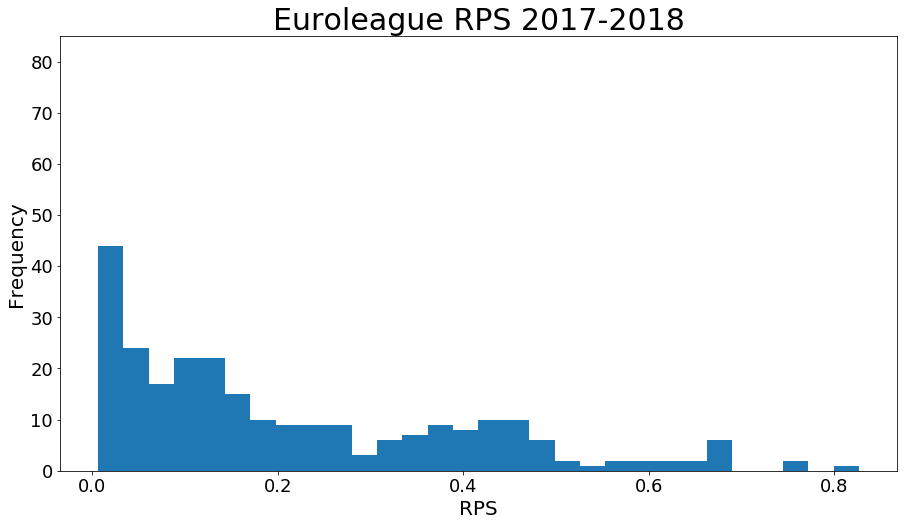

In [65]:
plt.figure(figsize=(15,8))



plt.hist(see_final_g["RPS"], 30, density=0)

plt.xlabel('RPS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Euroleague RPS 2017-2018',fontsize=30)
plt.ylim(0,85)
plt.show()

# Eurocup

In [66]:
ec_baseline_data = baseline_data[["Match Date","Home Team","Away Team","Team Result"]][baseline_data["Tournament"]=='Eurocup'].reset_index(drop = True)
ec_baseline_data.head()

,Match Date,Home Team,Away Team,Team Result
0,2013-10-15,Bonn,Alba Berlin,0.0
1,2013-10-15,Banvit,Kalev Cramo,1.0
2,2013-10-15,PAOK,Buducnost,1.0
3,2013-10-15,Bilbao,Cedevita,1.0
4,2013-10-15,Paris Levallois,Valencia,0.0


In [67]:
ec_x = pd.get_dummies(ec_baseline_data[["Home Team","Away Team"]]).reset_index(drop = True)
ec_y = ec_baseline_data["Team Result"]

In [68]:
ec_x.head()

,Home Team_AEK,Home Team_ASVEL Villeurbanne,Home Team_Alba Berlin,Home Team_Alba Fehervar,Home Team_Andorra,Home Team_Aris,Home Team_Armani Milano,Home Team_Artland Dragons,Home Team_Avtodor Saratov,Home Team_Bamberg,Home Team_Banvit,Home Team_Bayern Munich,Home Team_Besiktas,Home Team_Bilbao,Home Team_Bisons Loimaa,Home Team_Bonn,Home Team_Brindisi,Home Team_Budivelnyk,Home Team_Buducnost,Home Team_Cantu,Home Team_Cedevita,Home Team_Chalon Saone,Home Team_Cibona,Home Team_Crvena Zvezda,Home Team_Csu Asesoft Ploiesti,Home Team_Darussafaka,Home Team_Dijon,Home Team_Dinamo Sassari,Home Team_Fuenlabrada,Home Team_Galatasaray,Home Team_Gran Canaria,Home Team_Gravelines,Home Team_Hapoel Jerusalem,Home Team_Igokea,Home Team_Kalev Cramo,Home Team_Khimik,Home Team_Khimki,Home Team_Krasny Oktyabr,Home Team_Le Mans,Home Team_Lietkabelis,Home Team_Limoges,Home Team_Lokomotiv Kuban,Home Team_Ludwigsburg,Home Team_Lukoil Academic,Home Team_MZT Skopje,Home Team_Maccabi Haifa,Home Team_Maccabi Tel Aviv,Home Team_Mons,Home Team_Murcia,Home Team_Nancy,Home Team_Nanterre,Home Team_Neptunas,Home Team_Nizhny Novgorod,Home Team_Nymburk,Home Team_Oldenburg,Home Team_Olimpija Ljubljana,Home Team_Oostende,Home Team_PAOK,Home Team_Panionios,Home Team_Paris Levallois,Home Team_Partizan,Home Team_Pinar Karsiyaka,Home Team_Radnicki,Home Team_Real Betis,Home Team_Reggio Emilia,Home Team_Rytas Vilnius,Home Team_Siena,Home Team_Spartak St Petersburg,Home Team_Spirou Charleroi,Home Team_Steaua Bucharest,Home Team_Strasbourg,Home Team_Szolnoki,Home Team_Ted Ankara Kolejliler,Home Team_Tofas Bursa,Home Team_Trabzonspor,Home Team_Trento,Home Team_Turin,Home Team_Turow Zgorzelec,Home Team_Ulm,Home Team_Unicaja Malaga,Home Team_Unics Kazan,Home Team_VEF Riga,Home Team_Valencia,Home Team_Varese,Home Team_Venezia,Home Team_Ventspils,Home Team_Virtus Roma,Home Team_Zaragoza,Home Team_Zenit St Petersburg,Home Team_Zielona Gora,Away Team_AEK,Away Team_ASVEL Villeurbanne,Away Team_Alba Berlin,Away Team_Alba Fehervar,Away Team_Andorra,Away Team_Aris,Away Team_Armani Milano,Away Team_Artland Dragons,Away Team_Avtodor Saratov,Away Team_Bamberg,Away Team_Banvit,Away Team_Bayern Munich,Away Team_Besiktas,Away Team_Bilbao,Away Team_Bisons Loimaa,Away Team_Bonn,Away Team_Brindisi,Away Team_Budivelnyk,Away Team_Buducnost,Away Team_Cantu,Away Team_Cedevita,Away Team_Chalon Saone,Away Team_Cibona,Away Team_Crvena Zvezda,Away Team_Csu Asesoft Ploiesti,Away Team_Darussafaka,Away Team_Dijon,Away Team_Dinamo Sassari,Away Team_Fuenlabrada,Away Team_Galatasaray,Away Team_Gran Canaria,Away Team_Gravelines,Away Team_Hapoel Jerusalem,Away Team_Igokea,Away Team_Kalev Cramo,Away Team_Khimik,Away Team_Khimki,Away Team_Krasny Oktyabr,Away Team_Le Mans,Away Team_Lietkabelis,Away Team_Limoges,Away Team_Lokomotiv Kuban,Away Team_Ludwigsburg,Away Team_Lukoil Academic,Away Team_MZT Skopje,Away Team_Maccabi Haifa,Away Team_Maccabi Tel Aviv,Away Team_Mons,Away Team_Murcia,Away Team_Nancy,Away Team_Nanterre,Away Team_Neptunas,Away Team_Nizhny Novgorod,Away Team_Nymburk,Away Team_Oldenburg,Away Team_Olimpija Ljubljana,Away Team_Oostende,Away Team_PAOK,Away Team_Panionios,Away Team_Paris Levallois,Away Team_Partizan,Away Team_Pinar Karsiyaka,Away Team_Radnicki,Away Team_Real Betis,Away Team_Reggio Emilia,Away Team_Rytas Vilnius,Away Team_Siena,Away Team_Spartak St Petersburg,Away Team_Spirou Charleroi,Away Team_Steaua Bucharest,Away Team_Strasbourg,Away Team_Szolnoki,Away Team_Ted Ankara Kolejliler,Away Team_Tofas Bursa,Away Team_Trabzonspor,Away Team_Trento,Away Team_Turin,Away Team_Turow Zgorzelec,Away Team_Ulm,Away Team_Unicaja Malaga,Away Team_Unics Kazan,Away Team_VEF Riga,Away Team_Valencia,Away Team_Varese,Away Team_Venezia,Away Team_Ventspils,Away Team_Virtus Roma,Away Team_Zaragoza,Away Team_Zenit St Petersburg,Away Team_Zielona Gora
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
x_train_ec=ec_x.iloc[:len(ec_baseline_data[ec_baseline_data["Match Date"]<"2017-08-01"])]
y_train_ec=ec_y.iloc[:len(ec_baseline_data[ec_baseline_data["Match Date"]<"2017-08-01"])]
x_test_ec=ec_x.iloc[len(ec_baseline_data[ec_baseline_data["Match Date"]<"2017-08-01"]):]
y_test_ec=ec_y.iloc[len(ec_baseline_data[ec_baseline_data["Match Date"]<"2017-08-01"]):]

###  Logistic Regression

In [35]:
hyper_parameter_grid = {'C':uniform(0, 10),'penalty':['l1', 'l2']}
                       

lgr = RandomizedSearchCV(LogisticRegression(solver='liblinear'), hyper_parameter_grid, cv=KFold(10),scoring='brier_score_loss',
                         n_iter=10000,verbose = 1,n_jobs=-1)
lgr.fit(x_train_ec, y_train_ec)

print("Best parameters set found on held-out set:")
print()
print(lgr.best_params_)
print()
print("Best score found on held-out set:")
print(-lgr.best_score_)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2420 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 6420 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 12020 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 19220 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 28020 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 38420 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 50420 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 64020 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 79220 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 96020 tasks      | elapsed:  2.5min


Best parameters set found on held-out set:

{'C': 0.8226022521721554, 'penalty': 'l1'}

Best score found on held-out set:
0.21701799858838272


[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  2.6min finished


In [72]:
lgr = LogisticRegression(solver='liblinear',C= 0.8226022521721554, penalty= 'l1').fit(x_train_ec, y_train_ec)
y_pre_proba_lgr=lgr.predict_proba(x_test_ec)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_ec),3))


Logistic Regression

Test BS: 0.239

Test Accuracy: 0.636

Test F1-score 0.733


In [73]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],ec_x.columns.values):
    coef_dict[feat] = coef
coef4=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef4=coef4.iloc[(-coef4[0].abs()).argsort()].reset_index()

In [74]:
sorted_coef4.head(50)

,index,0
0,Away Team_Lokomotiv Kuban,-1.877191
1,Home Team_Khimki,1.867619
2,Home Team_Cibona,-1.865203
3,Home Team_Artland Dragons,-1.852307
4,Away Team_Gran Canaria,-1.644954
5,Away Team_Unics Kazan,-1.636263
6,Away Team_Bayern Munich,-1.512906
7,Away Team_Buducnost,1.451969
8,Away Team_Khimki,-1.438432
9,Home Team_MZT Skopje,-1.429049


#### Home Effect

In [75]:
lgr.intercept_

array([0.61830929])

## Random Forest Classifier

In [36]:
# Number of trees in random forest
n_estimators = randint(1, 100)
# Number of features to consider at every split
max_features = ["log2", 'sqrt']
# Maximum number of levels in tree
max_depth = randint(1, 50)
# Minimum number of samples required to split a internal node
min_samples_split = uniform(0, 1)
# Minimum number of samples required at each leaf node
min_samples_leaf =uniform(0, 0.5)

# Create the random grid
hyper_parameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rfc = RandomizedSearchCV(RandomForestClassifier(random_state =1), hyper_parameter_grid, cv=KFold(10),
                         scoring='brier_score_loss',n_iter=25000,verbose = 1,n_jobs=-1)


rfc.fit(x_train_ec, y_train_ec)

print("Best parameters set found on held-out set:")
print()
print(rfc.best_params_)
print()
print("Best score found on held-out set:")
print(-rfc.best_score_)

Fitting 10 folds for each of 25000 candidates, totalling 250000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 3092 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 4892 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 7092 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9692 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 12692 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 16092 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 19892 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 24092 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 28692 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 33692 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 39092 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 44892 tas

Best parameters set found on held-out set:

{'max_depth': 47, 'max_features': 'log2', 'min_samples_leaf': 0.0031813403505167592, 'min_samples_split': 0.06031041005066118, 'n_estimators': 23}

Best score found on held-out set:
0.21734629120420537


In [76]:
rfc = RandomForestClassifier(max_depth= 47, max_features='log2', min_samples_leaf=0.0031813403505167592,
                             min_samples_split=0.060310410050661, n_estimators=23,
                             random_state=1).fit(x_train_ec, y_train_ec)

y_pre_proba_rfc=rfc.predict_proba(x_test_ec)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(y_pre_proba_rfc[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_ec),3))

Random Forest Classifier

Test BS: 0.232

Test Accuracy: 0.636

Test F1-score 0.731


In [77]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),ec_x.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index()
sorted_coef2

,index,0
0,Away Team_Unics Kazan,0.062049
1,Away Team_Gran Canaria,0.050891
2,Away Team_Lokomotiv Kuban,0.048475
3,Away Team_Khimki,0.042825
4,Home Team_Artland Dragons,0.035675
5,Away Team_Valencia,0.029945
6,Away Team_Buducnost,0.028495
7,Home Team_Khimki,0.027997
8,Home Team_MZT Skopje,0.027889
9,Away Team_Bayern Munich,0.026083


## xgboost

In [37]:
hyper_parameter_grid = {"learning_rate": uniform(0.001,0.5),
                        'max_depth' : randint(1, 50),
                        "n_estimators":randint(1,100),
                        "subsample":uniform(0,1),
                        "colsample_bytree":uniform(0,1),
                        "gamma":uniform(0.0,10),
                        "reg_lambda":uniform(0.0,1)}

xgb = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), hyper_parameter_grid, cv=KFold(10),scoring='brier_score_loss',
                         n_iter=10000,verbose = 1,n_jobs=-1)
xgb.fit(x_train_ec, y_train_ec)

print("Best parameters set found on held-out set:")
print()
print(xgb.best_params_)
print()
print("Best score found on held-out set:")
print(-xgb.best_score_)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 902 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1364 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1980 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2726 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3488 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4398 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 5348 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 6500 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 7800 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 9194 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 10682 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 12330 tasks      

Best parameters set found on held-out set:

{'colsample_bytree': 0.9374993916796842, 'gamma': 0.9588348450897399, 'learning_rate': 0.19179947964522925, 'max_depth': 2, 'n_estimators': 95, 'reg_lambda': 0.49776296407167364, 'subsample': 0.48015025419763113}

Best score found on held-out set:
0.21559292817949544


In [78]:
alg = XGBClassifier(colsample_bytree= 0.9374993916796842, gamma= 0.9588348450897399, learning_rate= 0.19179947964522925,
                    max_depth= 2, n_estimators= 95, reg_lambda= 0.49776296407167364, subsample= 0.48015025419763113,
                    objective='binary:logistic').fit(x_train_ec, y_train_ec)

y_pre_proba_alg=alg.predict_proba(x_test_ec)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(y_pre_proba_alg[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_ec),3))


xgboost

Test BS: 0.237

Test Accuracy: 0.641

Test F1-score 0.734


In [79]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),ec_x.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index()
sorted_coef3

,index,0
0,Away Team_Strasbourg,0.023509
1,Away Team_Gran Canaria,0.021009
2,Home Team_Csu Asesoft Ploiesti,0.018113
3,Away Team_Unics Kazan,0.018059
4,Away Team_Pinar Karsiyaka,0.018044
5,Away Team_Besiktas,0.017694
6,Away Team_Lokomotiv Kuban,0.017299
7,Away Team_Bayern Munich,0.017285
8,Home Team_Zielona Gora,0.017266
9,Home Team_Artland Dragons,0.016830


In [80]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,ens_proba),3))
print()
y_pre_ens=np.where(pd.Series(ens_proba)>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_ens,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_ens,y_test_ec),3))


------Ensemble 3 classifier-------

Test BS: 0.235

Test Accuracy: 0.636

Test F1-score 0.733


In [81]:
pd.options.display.max_rows = None
see_final_g=ec_baseline_data[["Home Team","Away Team","Team Result"]][ec_baseline_data["Match Date"]>"2017-08-01"]
see_final_g["prediction probability"]=ens_proba
see_final_g["RPS"]=(see_final_g["Team Result"]-see_final_g["prediction probability"])**2
see_final_g[see_final_g["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
1133,Hapoel Jerusalem,Buducnost,0.0,0.894736,0.800553
1149,Darussafaka,Unics Kazan,1.0,0.280639,0.517480
1151,Ulm,Gran Canaria,1.0,0.291525,0.501937
1160,Galatasaray,Lietkabelis,0.0,0.831441,0.691295
1168,Cedevita,Unics Kazan,1.0,0.292868,0.500036
1174,Hapoel Jerusalem,Galatasaray,0.0,0.727366,0.529061
1205,Zenit St Petersburg,ASVEL Villeurbanne,0.0,0.790377,0.624695
1206,Alba Berlin,Limoges,0.0,0.731574,0.535200
1215,Unics Kazan,Darussafaka,0.0,0.777690,0.604801
1227,Hapoel Jerusalem,Reggio Emilia,0.0,0.786215,0.618133


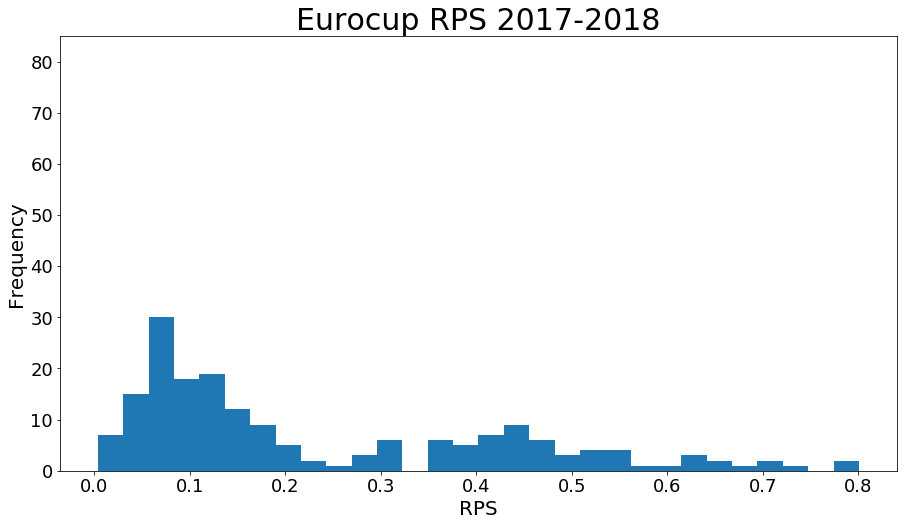

In [82]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,8))



plt.hist(see_final_g["RPS"], 30, density=0)

plt.xlabel('RPS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Eurocup RPS 2017-2018',fontsize=30)
plt.ylim(0,85)
plt.show()